## Business Objective
#### To find customer segments 

### Steps
    - Read & Visualize
    - clean data
    - Prepare data
    - Modelling
    - Analysis & Business Recommendation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
retail_df = pd.read_csv("Online+Retail.csv",sep=",",header=0,encoding="ISO-8859-1")

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### 1. Read & Viz*

In [4]:
retail_df.shape

(541909, 8)

In [5]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 2. Clean Data

In [7]:
#treat missing data
round(100*retail_df.isna().sum()/len(retail_df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
retail_df.shape

(541909, 8)

In [9]:
#drop all rows having missing values
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

### 3. Prepare Data for modelling

#### RFM
- R (recency) :  Number of days since last purchase
- F (frequency) : Number of txns
- M (Monetory) : Total revenue contribution


In [10]:
# Monetory
retail_df["amount"] = retail_df["Quantity"]*retail_df["UnitPrice"]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [11]:
grouped_df = retail_df.groupby("CustomerID")["amount"].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
#Frequency
frequency = retail_df.groupby("CustomerID")["InvoiceNo"].count()
frequency = frequency.reset_index()
frequency.columns = ["CustomerID","frequency"]

In [13]:
#merge two dfs
grouped_df = pd.merge(grouped_df,frequency,on="CustomerID",how="inner")
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
#recency
# assuming last date = 9/12/2011
#convert date format
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
amount         406829 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [16]:
# compute the max date
max_date = max(retail_df["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [17]:
#compute the diff
retail_df["diff"] = max_date - retail_df["InvoiceDate"]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [18]:
#recency column
last_purchase = retail_df.groupby("CustomerID")['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [19]:
grouped_df = pd.merge(grouped_df,last_purchase,on="CustomerID",how="inner")
grouped_df.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [20]:
grouped_df.columns

Index(['CustomerID', 'amount', 'frequency', 'diff'], dtype='object')

In [21]:
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']

In [22]:
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [23]:
# grouped_df['recency'].apply(lambda x: x.days)
grouped_df['recency'] = grouped_df['recency'].dt.days

In [24]:
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


#### outlier treatment
    - Statistical Outliers : don''t care about meaning of variable, just use statistical conditions
    - Domain Specific Outliers : does use variable meaning - go to client & ask does this look unusual?

{'whiskers': [<matplotlib.lines.Line2D at 0x21148a5b9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x21148a78080>,
 'boxes': [<matplotlib.lines.Line2D at 0x21148a5b630>],
 'medians': [<matplotlib.lines.Line2D at 0x21148a78710>],
 'fliers': [<matplotlib.lines.Line2D at 0x21148a78a58>],
 'means': []}

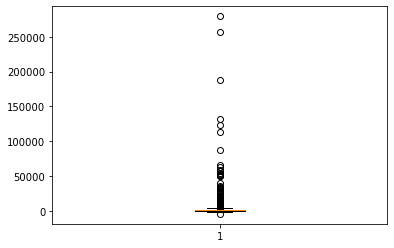

In [25]:
plt.boxplot(grouped_df['amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21148b03898>,
 'caps': [<matplotlib.lines.Line2D at 0x21148b03f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21148b03588>],
 'medians': [<matplotlib.lines.Line2D at 0x21148b11630>],
 'fliers': [<matplotlib.lines.Line2D at 0x21148b11978>],
 'means': []}

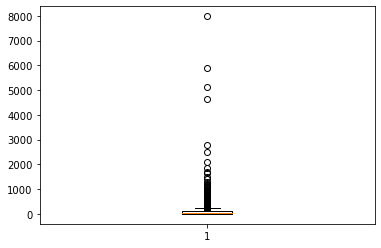

In [26]:
plt.boxplot(grouped_df['frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21148b75860>,
 'caps': [<matplotlib.lines.Line2D at 0x21148b75f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21148b75710>],
 'medians': [<matplotlib.lines.Line2D at 0x21148b7f630>],
 'fliers': [<matplotlib.lines.Line2D at 0x21148b7f978>],
 'means': []}

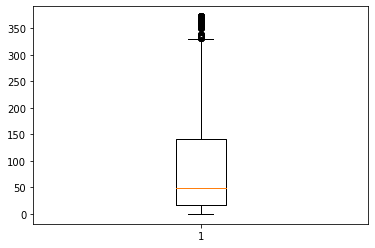

In [27]:
plt.boxplot(grouped_df['recency'])

In [28]:
#we can see that there are outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3-Q1
grouped_df = grouped_df[(grouped_df.amount>= Q1-1.5*IQR) & (grouped_df.amount<= Q3+1.5*IQR)]

Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3-Q1
grouped_df = grouped_df[(grouped_df.recency>= Q1-1.5*IQR) & (grouped_df.recency<= Q3+1.5*IQR)]

Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3-Q1
grouped_df = grouped_df[(grouped_df.frequency>= Q1-1.5*IQR) & (grouped_df.frequency<= Q3+1.5*IQR)]

#### Rescaling (as without it, euclidean distance will be affected )

In [29]:
rfm_df = grouped_df[["amount","frequency","recency"]]
rfm_df.head()

,amount,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [30]:
import sklearn
from sklearn.preprocessing import StandardScaler

# instantiate a scale
scaler = StandardScaler()

# fit transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [31]:
#Hopkins score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


#First convert the numpy array that you have to a dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']


#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.953837705193862

### 4. Modelling

In [32]:
from sklearn.cluster import KMeans

In [33]:
rfm_scaled = pd.DataFrame(rfm_df_scaled)

In [34]:
# help(KMeans)

In [35]:
kmeans = KMeans(n_clusters=4,max_iter=50)
#fir
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
kmeans.labels_

array([3, 2, 1, ..., 3, 1, 1])

#### optimal k/number of clusters
    - Method I : Elbow Curve / Sum of Squared Distances(SSD)
    - Method II: Silhouette Score

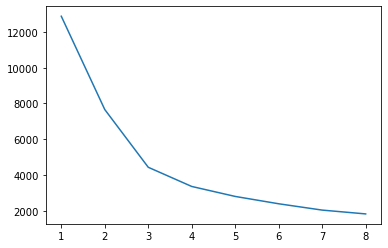

In [37]:
#Method I : Elbow Curve / Sum of Squared Distances(SSD)
ssd = []
range_n_clusters = [1,2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters,ssd)

In [38]:
# from above graph, best_k=3

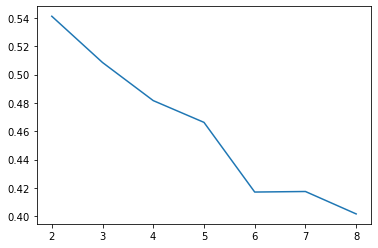

In [39]:
#Method II -  silhouette analysis
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3,4,5,6,7,8]
silhouette_avgs = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    silhouette_avg = silhouette_score(rfm_df_scaled,kmeans.labels_)
    silhouette_avgs.append(silhouette_avg)

plt.plot(range_n_clusters,silhouette_avgs)

In [40]:
#above graph entails that silleheute score of k=2 is highest, so this analysis suggests best_k = 2.
#But, we need to consider business understanding to finalize k(here k=3)

In [41]:
#final clusters
kmeans = KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)
labels = kmeans.labels_

In [42]:
grouped_df['cluster_id'] = labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


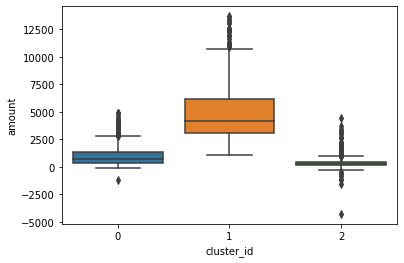

In [43]:
sns.boxplot(x="cluster_id",y="amount",data=grouped_df)

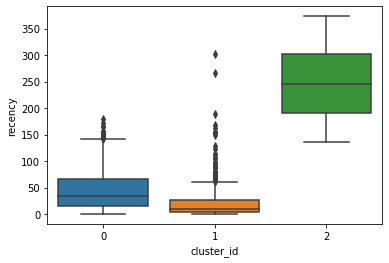

In [44]:
sns.boxplot(x="cluster_id",y="recency",data=grouped_df)

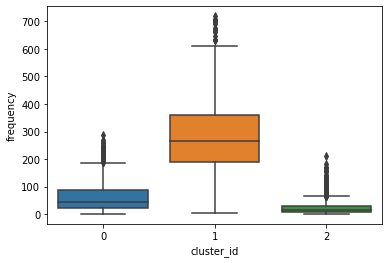

In [45]:
sns.boxplot(x="cluster_id",y="frequency",data=grouped_df)

In [46]:
#Graded Questions

In [47]:
cricket_df1 = pd.read_csv("Cricket.csv",sep=",",header=0,encoding="ISO-8859-1")
cricket_df1.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [48]:
cricket_df = cricket_df1[["SR","Ave"]]

In [49]:
cricket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
SR     79 non-null float64
Ave    79 non-null float64
dtypes: float64(2)
memory usage: 1.4 KB


In [50]:
cricket_df.head()

,SR,Ave
0,86.23,44.83
1,78.86,41.98
2,80.39,42.03
3,91.20,32.36
4,78.96,33.37


In [51]:
scaler = StandardScaler()
scaled = scaler.fit_transform(cricket_df)
scaled.shape

(79, 2)

In [52]:
cricket_df = pd.DataFrame(scaled)
cricket_df.columns = ["SR","Ave"]
cricket_df.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [53]:
kmeans_cricket = KMeans(n_clusters=4,max_iter=50, random_state=100)
kmeans_cricket.fit(cricket_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [54]:
cricket_df1['cluster_id'] = kmeans_cricket.labels_

In [55]:
cricket_df1.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2


In [57]:
# cricket_df1.sort_values(by="cluster_id").to_csv("graded_kmeans.csv",index=False)

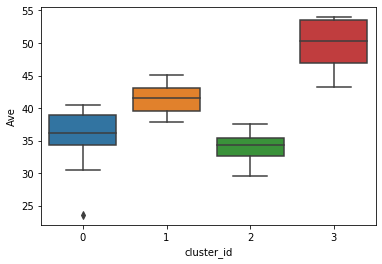

In [58]:
sns.boxplot(x="cluster_id",y="Ave",data=cricket_df1)

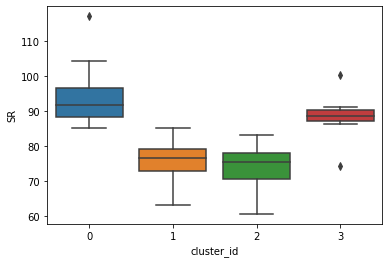

In [59]:
sns.boxplot(x="cluster_id",y="SR",data=cricket_df1)

# Hierarchical Clustering

In [60]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [61]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [62]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


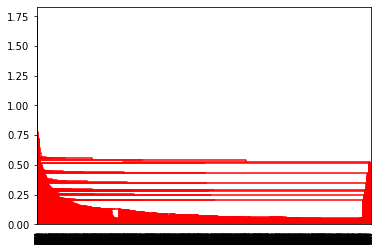

In [63]:
#single linkage
mergings = linkage(rfm_df_scaled,method="single",metric='euclidean')
dendrogram(mergings)
plt.show()

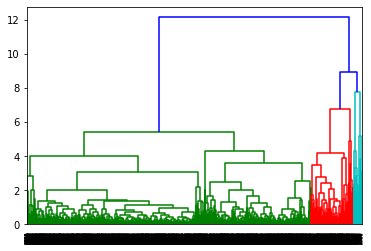

In [64]:
#complete linkage
mergings = linkage(rfm_df_scaled,method="complete",metric='euclidean')
dendrogram(mergings)
plt.show()

In [65]:
#Now, we want to create 3 clusters using 'cut_tree' module
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)

In [67]:
grouped_df['cluster_labels'] = cluster_labels

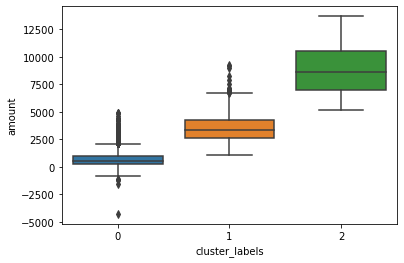

In [68]:
sns.boxplot(x="cluster_labels",y="amount",data=grouped_df)

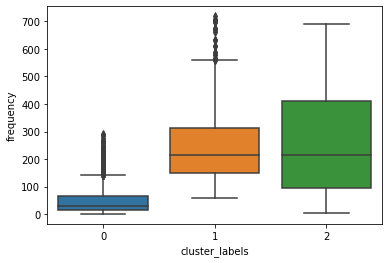

In [69]:
sns.boxplot(x="cluster_labels",y="frequency",data=grouped_df)

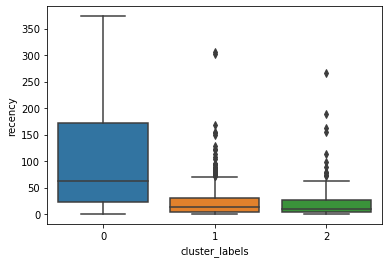

In [70]:
sns.boxplot(x="cluster_labels",y="recency",data=grouped_df)

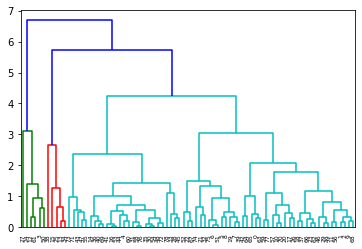

In [71]:
#Graded
#complete linkage
mergings = linkage(cricket_df,method="complete",metric='euclidean')
dendrogram(mergings)
plt.show()

In [72]:
#Now, we want to create 3 clusters using 'cut_tree' module
cluster_labels = cut_tree(mergings,n_clusters=4).reshape(-1,)

In [74]:
cricket_df1['cluster_id_h'] = cluster_labels

In [75]:
cricket_df1.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_id,cluster_id_h
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0,1
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,2


In [76]:
cricket_df1.sort_values(by="cluster_id_h").to_csv("graded_kmeans.csv",index=False)

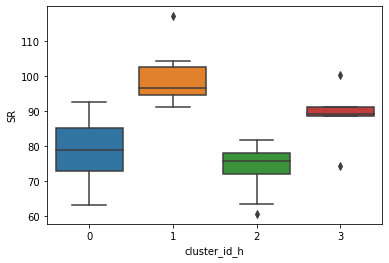

In [77]:
sns.boxplot(x="cluster_id_h",y="SR",data=cricket_df1)